# K-means

In [2]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [3]:
# Generate Data
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
              (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
              (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

### Main functions

In [4]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


In [5]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [6]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [7]:
def main(points):
    num_iterations = 100
    k = 3
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(num_iterations):
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    
    return centroids

In [11]:
centroids = main(points)

array([[ 0.97181323, -0.87935348],
       [-0.48547166,  0.05032143],
       [ 1.30732263,  0.32800894]])

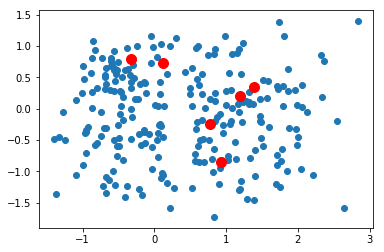

In [20]:
centroids = initialize_centroids(points, 6)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()

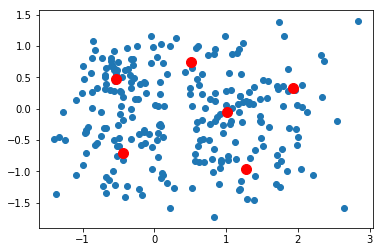

In [28]:
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()